In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle, Rectangle, Arc

please input the player's ID: 203999
please input the NBA season: 2018-19


/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


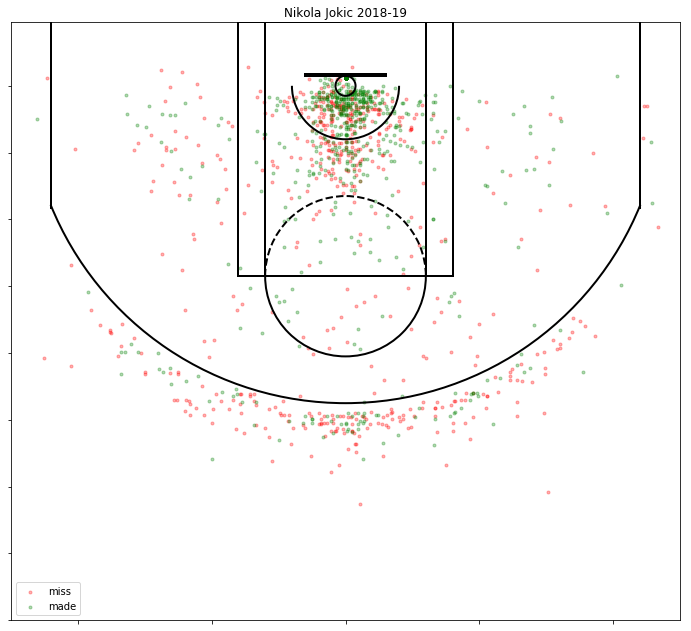

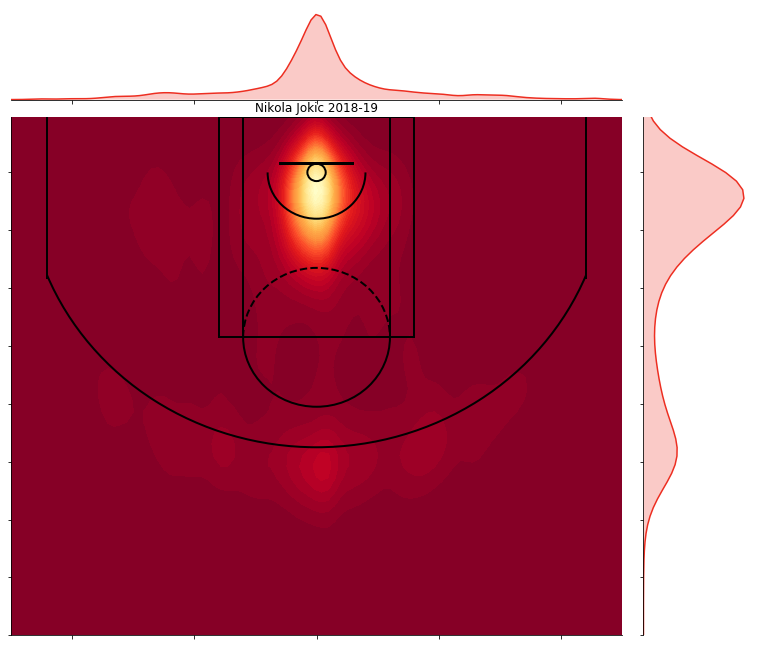

In [6]:
a = input("please input the player's ID: ")
b = input("please input the NBA season: ")
url = "https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=33&CFPARAMS="+ b +"&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID="+ a +"&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season="+ b +"&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID="
headers = {'User-Agent':'chrome'}
response = requests.get(url, headers=headers)
data = response.json()
headers = data['resultSets'][0]['headers']
game_stat = data['resultSets'][0]['rowSet']
game_stat_df = pd.DataFrame(game_stat, columns=headers)

made = game_stat_df[game_stat_df['SHOT_MADE_FLAG']==1]
miss = game_stat_df[game_stat_df['SHOT_MADE_FLAG']==0]
plt.figure(figsize=(12,11))
plt.ylim(400,-47.5)
plt.xlim(-250,250)
plt.scatter(miss.LOC_X,miss.LOC_Y,c='r',marker='.',alpha=0.3,label='miss')
plt.scatter(made.LOC_X,made.LOC_Y,c='g',marker='.',alpha=0.3,label='made')
plt.tick_params(labelbottom=False, labelleft=False)
create_court()
name = game_stat_df.iloc[0]['PLAYER_NAME']
plt.title(name+" "+b)
plt.legend()

cmap=plt.cm.YlOrRd_r
plot = sns.jointplot(x = game_stat_df.LOC_X,y=game_stat_df.LOC_Y,kind='kde',stat_func=None,color=cmap(0.3),cmap=cmap,n_levels =50)
plot.fig.set_size_inches(12,10)
ax = plot.ax_joint
ax.set_ylim(400,-47.5)
ax.set_xlim(-250,250)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')
create_court(ax)
ax.set_title(name +' '+b)

plt.show()

In [2]:
def create_court(ax=None,color='black',lw=2):
    if ax is None:
        ax = plt.gca()
    
    hoop = Circle((0,0), radius =7.5, linewidth=lw, color=color, fill=False)
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    outer_box = Rectangle((-80,-47.5),160,190,linewidth=lw, color=color,fill=False)
    inner_box = Rectangle((-60, -47.5), 120,190, linewidth=lw, color=color,fill=False)
    top_free_throw = Arc((0,142.5), 120,120,theta1=0,theta2=180,linewidth=lw, color=color)
    bottom_free_throw = Arc((0,142.5), 120,120,theta1=180,theta2=0,linewidth=lw, color=color, linestyle='dashed')
    restricted_area = Arc((0,0), 80,80,theta1=0,theta2=180,linewidth=lw,color=color)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,color=color)
    
    court_elements = [hoop,backboard,outer_box,inner_box,top_free_throw,bottom_free_throw,restricted_area,corner_three_a,corner_three_b,three_arc]
    
    for element in court_elements:
        ax.add_patch(element)
        
    return ax